<a href="https://www.kaggle.com/code/seanguglietti/historical-popularity-index-analysis?scriptVersionId=289881798" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

Created by Sean Guglietti
2026-01-01

# Historical Popularity Index Analysis

    - This exploratory analysis aims to investigate the "Historical Popularity Index", or "Pantheon Project" dataset. 
    - The dataset aims to provide a means of comparing 'popularity' amongst historical figures, by using metrics such as "page views", "article languages", and "average views". This is then summarized with the actual "historical popularity index" feature.
    - First we must see what features the dataset has, and then try and get a grasp on trends/outliers.

In [1]:
# Imports

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # data visualization 
import folium
import matplotlib.pyplot as plt
import geopandas as gpd
import requests

In [2]:
# Importing Data

filepath = '/kaggle/input/pantheon-project/database.csv'

pantheon = pd.read_csv(filepath)

pantheon.head()

,article_id,full_name,sex,birth_year,city,state,country,continent,latitude,longitude,occupation,industry,domain,article_languages,page_views,average_views,historical_popularity_index
0,308,Aristotle,Male,-384,Stageira,NaN,Greece,Europe,40.33333,23.50000,Philosopher,Philosophy,Humanities,152,56355172,370758,31.9938
1,22954,Plato,Male,-427,Athens,NaN,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,142,46812003,329662,31.9888
2,1095706,Jesus Christ,Male,-4,Judea,NaN,Israel,Asia,32.50000,34.90000,Religious Figure,Religion,Institutions,214,60299092,281771,31.8981
3,25664190,Socrates,Male,-469,Athens,NaN,Greece,Europe,37.96667,23.71667,Philosopher,Philosophy,Humanities,137,40307143,294213,31.6521
4,783,Alexander the Great,Male,-356,Pella,NaN,Greece,Europe,40.80000,22.51667,Military Personnel,Military,Institutions,138,48358148,350421,31.5840


In [3]:
pantheon.count()

article_id                     11341
full_name                      11341
sex                            11341
birth_year                     11341
city                           11341
state                           2172
country                        11308
continent                      11311
latitude                       10294
longitude                      10294
occupation                     11341
industry                       11341
domain                         11341
article_languages              11341
page_views                     11341
average_views                  11341
historical_popularity_index    11341
dtype: int64

### Initial observations
    - The dataset contains geographical information for each person, as well as their birth year, occupation, domain, and industry. These features could all be used for interesting analyses, such as which country is the "most popular" historically, when the most popular people were typically born, which occupations produced the most popular people, as well as a geospatial analysis as the latitude and longitude features lend the dataset nicely to some interactive maps, via Folium for example.
    - The dataset is sorted in descending order according to the historical_popularity_index feature, thus we can simply query the top X records to get the top X most popular historical figures.

<function matplotlib.pyplot.show(close=None, block=None)>

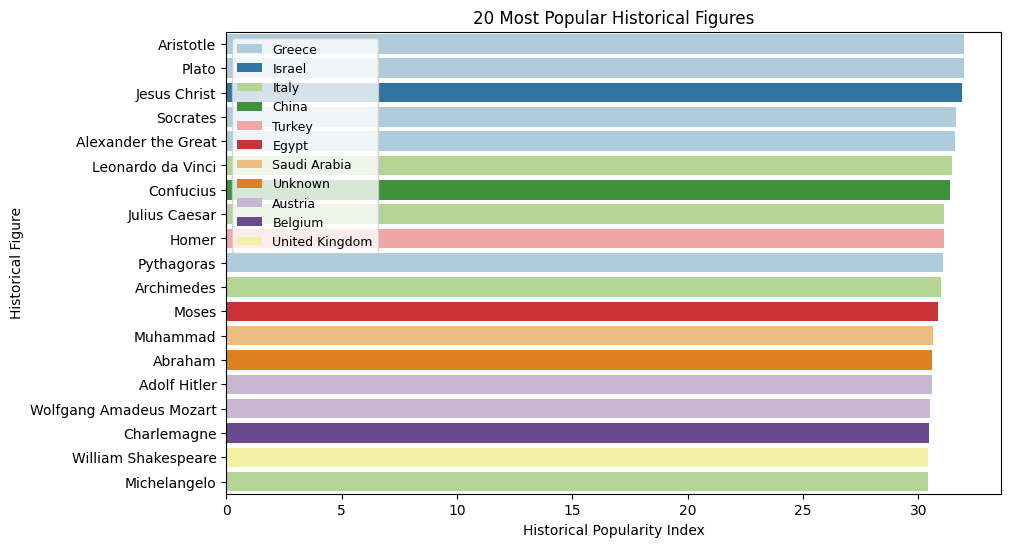

In [4]:
# Top 20 historical figures

panth_20 = pantheon[0:19]
features = ['historical_popularity_index','full_name', 'country']

fig, ax = plt.subplots(figsize=(10,6))
ax.set_title("20 Most Popular Historical Figures")
ax = sns.barplot(data = panth_20[features], x = 'historical_popularity_index', y = 'full_name',
                palette = "Paired",hue = "country", dodge = False)

ax.set_xlabel("Historical Popularity Index")
ax.set_ylabel("Historical Figure")

plt.legend(loc = "upper left",fontsize=9)
plt.show

    - The above chart shows the top 20 most popular historical figures (according to the historical popularity index), and also provides a color encoding to show what country each figure originates from. We see that 4 of the top 5 historical figures originate from Greece, and a number of the other figures originate from Italy.

## Historical Popularity by Country
    - This section will group the data by country, summing the historical popularity index per figure to get an idea of what countries are historically "most popular".

In [5]:
# Getting GeoJSON with country boundaries
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json'
geo_json_data = requests.get(url).json()

In [6]:
# This cell is for data cleaning and record creation. The Dataset and the geoJSON data used 
# to create the interactive map do not agree on the names, so we have to rename the countries
# in the pantheon dataframe to match the geoJSON data, or else those countries will appear
# blacked out.

# This creates the country_pantheon dataframe, which will summarize all the historical figures
# from each country and sum up the total popularity score.

country_pantheon = pantheon[['country','historical_popularity_index']]
country_pantheon = country_pantheon.groupby(["country"])['historical_popularity_index'].sum().reset_index()

# These lines are all to rename the countries in the country_pantheon dataframe to align
# with the geoJSON data names, so the tooltips work and the countries don't appear blacked out.

country_pantheon.loc[country_pantheon['country']=='United States', 'country']='United States of America'
country_pantheon.loc[country_pantheon['country']=='Republic Of Macedonia', 'country']='Macedonia'
country_pantheon.loc[country_pantheon['country']=='Tanzania', 'country']='United Republic of Tanzania'
country_pantheon.loc[country_pantheon['country']=='Democratic Republic Of Congo', 'country']='Republic of the Congo'
country_pantheon.loc[country_pantheon['country']=='Congo', 'country']='Democratic Republic of the Congo'
country_pantheon.loc[country_pantheon['country']=='Myanmar [Burma]', 'country']='Myanmar'
country_pantheon.loc[country_pantheon['country']=='Guinea-Bissau', 'country']='Guinea Bissau'
country_pantheon.loc[country_pantheon['country']=='Brunei Darussalam', 'country']='Brunei'
country_pantheon.loc[country_pantheon['country']=='Serbia', 'country']='Republic of Serbia'
country_pantheon.loc[country_pantheon['country']=='Bosnia And Herzegovina', 'country']='Bosnia and Herzegovina'

# Some countries did not have representatives in the pantheon dataset, so this will
# fill in those countries with placeholder values (1) so they do not appear blacked out.

new_rec = {'country':'Niger', 'historical_popularity_index':1}
country_pantheon = pd.concat([country_pantheon,pd.DataFrame([new_rec])],ignore_index=True)
new_rec = {'country':'Antarctica', 'historical_popularity_index':1}
country_pantheon = pd.concat([country_pantheon,pd.DataFrame([new_rec])],ignore_index=True)
new_rec = {'country':'Gabon', 'historical_popularity_index':1}
country_pantheon = pd.concat([country_pantheon,pd.DataFrame([new_rec])],ignore_index=True)
new_rec = {'country':'Somaliland', 'historical_popularity_index':1}
country_pantheon = pd.concat([country_pantheon,pd.DataFrame([new_rec])],ignore_index=True)
new_rec = {'country':'Papua New Guinea', 'historical_popularity_index':1}
country_pantheon = pd.concat([country_pantheon,pd.DataFrame([new_rec])],ignore_index=True)

In [7]:
# This cell will add a new 'property' to each country in the geo_json_data dataframe
# which corresponds to the cumulative popularity of all historical figures from that
# country.

countrypanth_indexed = country_pantheon.set_index('country')

for c in geo_json_data['features']:
    try:
        c['properties']['popularity'] = countrypanth_indexed.loc[c['properties']['name'], 'historical_popularity_index']
    except KeyError:
        c['properties']['popularity'] = 0

In [8]:
# Creating the map and adding tooltips.

m = folium.Map(location = [0,0],zoom_start=2)

choropleth = folium.Choropleth(
    geo_data = geo_json_data,
    name = 'choropleth',
    data = country_pantheon,
    columns = ['country','historical_popularity_index'],
    key_on = 'feature.properties.name',
    fill_color = "Greens"
).add_to(m)


folium.GeoJson(
    geo_json_data,
    tooltip=folium.GeoJsonTooltip(fields=['name','popularity'],aliases=['Country','Popularity']),
    style_function=lambda feature: {
        "fillColor": "#ffff00",
        "color": "black",
        "weight": 2,
        "dashArray": "5, 5",
    },
).add_to(m)

m

# Observations
    - The United States has an overwhelmingly large representation in the pantheon dataset, it's score is nearly double that of the next highest. This disparity can be seen in the fact that there is no other country colored in the deepest shade of green.
    - This highlights the "Western bias" (as I will call it here) of this dataset. I believe since the popularity is based largely on internet searches, it makes sense that the countries with the highest internet usage will in turn search for local 'figures' more often. Specifically, China and India not being in at least the second tier for the color mapping highlights this bias. This could also be due to how the data was collected. Regardless, this map highlights this bias.
    - An interesting follow-up analysis would be to see if there is any difference if instead of taking the summation of all the historical figures, we take the count of figures over a certain popularity threshold. Comparing this to a similar graph with all the figures should highlight the Western Bias some more.

Text(0, 0.5, 'Country')

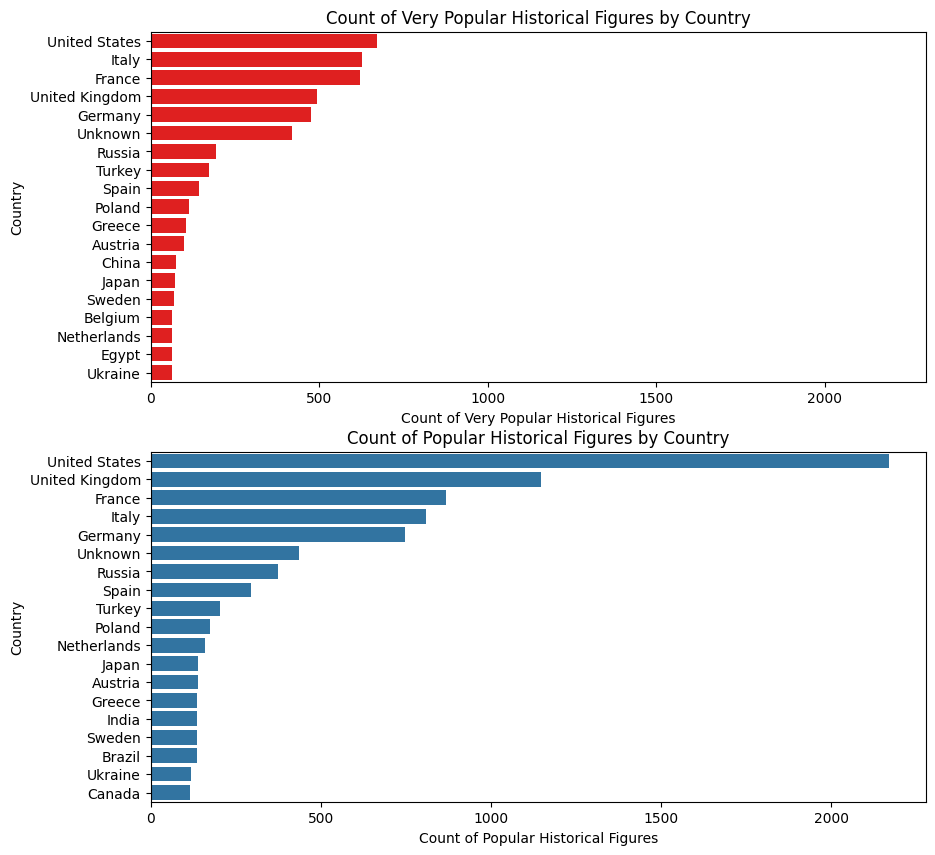

In [9]:
# For the follow-up analysis, I want to find countries with the most historical figures over a certain threshold of popularity. 
# The threshold I chose was the mean of the feature, which was found to be roughly 23.

pantheon_count = pantheon.groupby('country').count().reset_index()
pantheon_count = pantheon_count.sort_values(by='historical_popularity_index', ascending = False)[0:19]

# Aggregating pantheon dataframe to only include historical figures with a popularity index above the mean.

pantheon_top = pantheon[pantheon['historical_popularity_index']>23]
agg_pantheon_top = pantheon_top.groupby('country').count().reset_index()
agg_pantheon_top = agg_pantheon_top.sort_values(by = 'historical_popularity_index', ascending = False)[0:19]

# Plotting both graphs

features = ['historical_popularity_index','country']

fig, (ax1,ax2) = plt.subplots(2, 1, figsize=(10,10))
ax1.set_title("Count of Very Popular Historical Figures by Country")
sns.barplot(data = agg_pantheon_top[features], x = 'historical_popularity_index', y = 'country', ax = ax1, color = 'Red')
ax1.set_xlim(0, 2300)

ax1.set_xlabel("Count of Very Popular Historical Figures")
ax1.set_ylabel("Country")

ax2.set_title("Count of Popular Historical Figures by Country")
sns.barplot(data = pantheon_count[features], x = 'historical_popularity_index', y = 'country',
                  dodge = False, ax = ax2)

ax2.set_xlabel("Count of Popular Historical Figures")
ax2.set_ylabel("Country")



### Observations
    - Very interestingly, 'Unknown' places within the top 10 countries for both plots of historical figures.
    - This does cut the lead of the states quite a bit, instead of them nearly doubling the next highest in terms of cumulative popularity, they only account for 14% more very popular historical figures than the next country, Italy in the very popular historical figures graph.
    - The contrasting graphs again highlight the Western bias, the United States have nearly double the count of popular historical figures compared to the second place country, the United Kingdom. 